# Nature Conservancy Fisheries Kaggle Competition
## Backdoor for manual additions to the fovea_dictionary for FishFinder training
This script can be used prior to, or during training of FishFinder NN, in order to manually annotate randomly generated fovea.
#### Dependencies

In [1]:
import numpy as np
import pandas as pd
import pickle
from scipy import misc
import os
import fish_data as fd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
version_ID = 'v1.0'

wd = os.getcwd()
verdir = wd+'/FishFinder_v2/'+version_ID
if not os.path.exists(verdir) :
    os.makedirs(verdir)

In [3]:
fov_size = 128
from_empty = False

#### Load dictionaries
Generated in `FishFinder_SETUP.ipynb`

In [4]:
if from_empty == True :

    with open('image_dictionary.pickle', 'rb') as handle : 
        image_dictionary = pickle.load(handle)

    with open('fovea_dictionary.pickle', 'rb') as handle : 
        fovea_dictionary = pickle.load(handle)
    with open('validation_dictionary.pickle', 'rb') as handle :
        validation_dictionary = pickle.load(handle)

elif from_empty == False :
    with open('image_dictionary.pickle', 'rb') as handle : 
        image_dictionary = pickle.load(handle)

    with open(verdir+'/fovea_dictionary.pickle', 'rb') as handle : 
        fovea_dictionary = pickle.load(handle)
    
    with open(verdir+'/validation_dictionary.pickle', 'rb') as handle :
        validation_dictionary = pickle.load(handle)

    
    
print("Fovea Training Set")
fish_counts = []
for fish_class in fovea_dictionary :
    fish_counts.append((fish_class, len(fovea_dictionary.get(fish_class))))
    print("{} : {} images".format(fish_counts[-1][0], fish_counts[-1][1]))

print("\nValidation Training Set")
fish_counts = []
for fish_class in validation_dictionary :
    fish_counts.append((fish_class, len(validation_dictionary.get(fish_class))))
    print("{} : {} images".format(fish_counts[-1][0], fish_counts[-1][1]))


Fovea Training Set
LAG : 107 images
DOL : 98 images
BET : 114 images
ALB : 159 images
NoF : 7981 images
SHARK : 107 images
YFT : 97 images
OTHER : 78 images

Validation Training Set
LAG : 0 images
DOL : 0 images
BET : 0 images
ALB : 0 images
NoF : 0 images
SHARK : 0 images
YFT : 0 images
OTHER : 0 images


## Annotate Fovea and stage

In [5]:
next_class = fish_counts[np.argmin( [x[1] for x in fish_counts]  )][0]

f_list = []
for f in image_dictionary.get('train') :
    if f.find(next_class) != -1 :
        f_list.append(f)

In [6]:
key = np.random.choice(f_list)
print(key)

data/train/LAG/img_04711.jpg


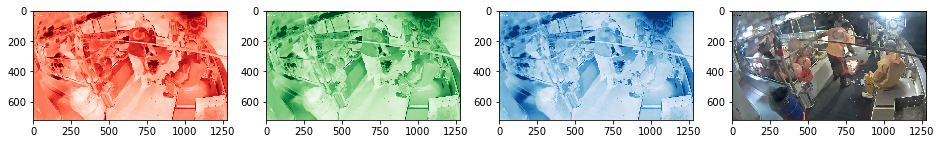

In [7]:
img_working = misc.imread(key, mode = 'RGB')
fd.show_panel(img_working)

### Write annote function

Label: LAG
Scale: 1.5


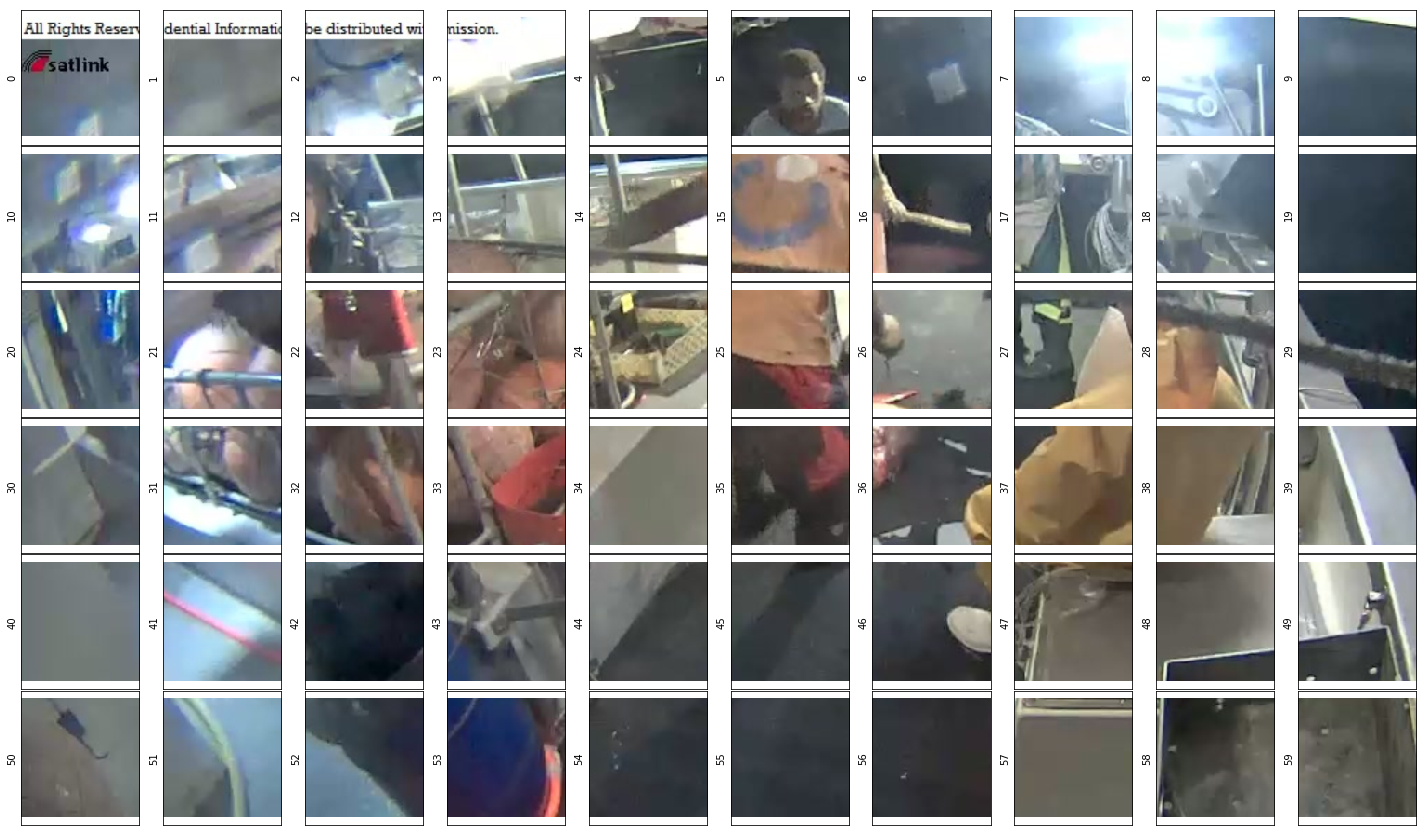

Stage to fish    
Scale: 1.25


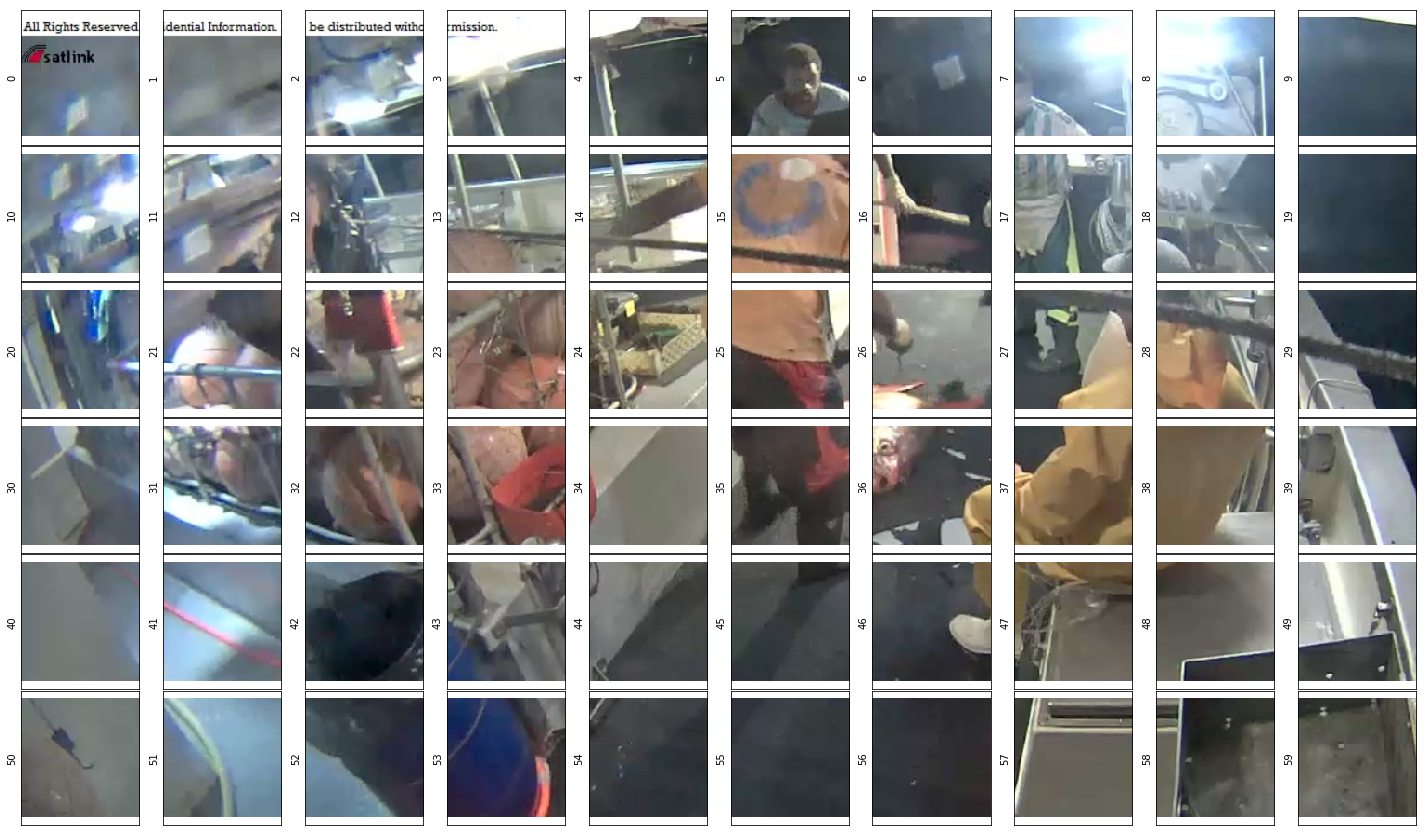

KeyboardInterrupt: 

In [8]:
fd.annote_fovea_manager(key, image_dictionary = image_dictionary, fovea_dictionary = fovea_dictionary, 
                        validation_dictionary = validation_dictionary,
                            fov_size = fov_size, scale = [1.5, 1.25, 1.0, 0.75, 0.5], 
                            y_bins = 6, x_bins = 10, pixel_norm = None, verdir = verdir) 

#### 

In [16]:
list(fovea_dictionary.keys())

['LAG', 'DOL', 'BET', 'ALB', 'NoF', 'SHARK', 'YFT', 'OTHER']

In [17]:
for key in fovea_dictionary.keys() :
        print(np.random.choice(list(fovea_dictionary.get(key).keys()),8))
        break

['data/train/LAG/img_01644.jpg_0.032390224002282086'
 'data/train/LAG/img_07334.jpg_0.14052369297120637'
 'data/train/LAG/img_01644.jpg_0.032390224002282086'
 'data/train/LAG/img_07334.jpg_0.4074181385279725'
 'data/train/LAG/img_01644.jpg_0.20043488459884173'
 'data/train/LAG/img_01644.jpg_0.21944086362127768'
 'data/train/LAG/img_01644.jpg_0.8110805107261264'
 'data/train/LAG/img_01644.jpg_0.8531526443459932']


In [29]:
batch_dicts = {}
for key in fovea_dictionary.keys() :
    key_list = [] 
    key_list.extend(np.random.choice(list(fovea_dictionary.get(key).keys()), 2))
    
    for k in key_list :
        
        print(fovea_dictionary.get(key).get(k))


{'fov_label': 'LAG', 'x_offset': 398, 'y_offset': 138, 'scale': 0.5, 'f': 'data/train/LAG/img_01644.jpg'}
{'fov_label': 'LAG', 'x_offset': 227, 'y_offset': 184, 'scale': 0.5, 'f': 'data/train/LAG/img_01644.jpg'}
{'fov_label': 'DOL', 'x_offset': 384, 'y_offset': 354, 'scale': 1.0, 'f': 'data/train/DOL/img_03546.jpg'}
{'fov_label': 'DOL', 'x_offset': 113, 'y_offset': 138, 'scale': 0.5, 'f': 'data/train/DOL/img_03296.jpg'}
{'fov_label': 'BET', 'x_offset': 256, 'y_offset': 237, 'scale': 1.0, 'f': 'data/train/BET/img_07734.jpg'}
{'fov_label': 'BET', 'x_offset': 655, 'y_offset': 154, 'scale': 1.25, 'f': 'data/train/BET/img_01218.jpg'}
{'fov_label': 'ALB', 'x_offset': 342, 'y_offset': 185, 'scale': 0.5, 'f': 'data/train/ALB/img_02140.jpg'}
{'fov_label': 'ALB', 'x_offset': 85, 'y_offset': 74, 'scale': 0.75, 'f': 'data/train/ALB/img_06344.jpg'}
{'fov_label': 'NoF', 'x_offset': 597, 'y_offset': 191, 'scale': 1.5, 'f': 'data/train/SHARK/img_05519.jpg'}
{'fov_label': 'NoF', 'x_offset': 454, 'y_off

In [20]:
len(batch_keys) == 16

True

In [21]:
batch_keys

['data/train/LAG/img_04199.jpg_0.7062606678013026',
 'data/train/LAG/img_07334.jpg_0.12540611372557398',
 'data/train/DOL/img_04927.jpg_0.8408801314095959',
 'data/train/DOL/img_04927.jpg_0.3218595392488005',
 'data/train/BET/img_01218.jpg_0.28705141354551844',
 'data/train/BET/img_01218.jpg_0.9375733989714073',
 'data/train/ALB/img_07271.jpg_0.7772459558915171',
 'data/train/ALB/img_07271.jpg_0.8687481592047505',
 'data/train/ALB/img_03202.jpg_0.8386515355870057',
 'data/train/DOL/img_03546.jpg_0.4630605825744182',
 'data/train/SHARK/img_00427.jpg_0.2615212105924756',
 'data/train/SHARK/img_06474.jpg_0.2884047936594393',
 'data/train/YFT/img_07891.jpg_0.6079800246503233',
 'data/train/YFT/img_07891.jpg_0.21136672574856952',
 'data/train/OTHER/img_05114.jpg_0.5623127002436037',
 'data/train/OTHER/img_01697.jpg_0.35587104059698704']

In [24]:
for key in batch_keys :
    fd.show_panel(fd.retrieve_fovea(key, fovea_dictionary= fovea_dictionary))

AttributeError: 'NoneType' object has no attribute 'get'